In [76]:
# imports and config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [20, 10]


In [77]:
# read in original dataset
original_data_set = pd.read_csv("./DSL-StrongPasswordData.csv")


In [78]:
# create dataframe with differences
def calculate_differences(browser_data_set: pd.DataFrame, original_data_set: pd.DataFrame) -> pd.DataFrame:
    diffs = []
    for i in range(0, len(browser_data_set)):
        original_row = original_data_set.iloc[i]
        browser_row = browser_data_set.iloc[i]

        diffs_row = {
            "subject": original_row['subject'],
            "sessionIndex": original_row['sessionIndex'],
            "rep": original_row['rep'],
            "H.period": abs(original_row['H.period'] - browser_row['H.period']),
            "DD.period.t": abs(original_row['DD.period.t'] - browser_row['DD.period.t']),
            "UD.period.t": abs(original_row['UD.period.t'] - browser_row['UD.period.t']),
            "H.t": abs(original_row['H.t'] - browser_row['H.t']),
            "DD.t.i": abs(original_row['DD.t.i'] - browser_row['DD.t.i']),
            "UD.t.i": abs(original_row['UD.t.i'] - browser_row['UD.t.i']),
            "H.i": abs(original_row['H.i'] - browser_row['H.i']),
            "DD.i.e": abs(original_row['DD.i.e'] - browser_row['DD.i.e']),
            "UD.i.e": abs(original_row['UD.i.e'] - browser_row['UD.i.e']),
            "H.e": abs(original_row['H.e'] - browser_row['H.e']),
            "DD.e.five": abs(original_row['DD.e.five'] - browser_row['DD.e.five']),
            "UD.e.five": abs(original_row['UD.e.five'] - browser_row['UD.e.five']),
            "H.five": abs(original_row['H.five'] - browser_row['H.five']),
            "DD.five.Shift.r": abs(original_row['DD.five.Shift.r'] - browser_row['DD.five.Shift.r']),
            "UD.five.Shift.r": abs(original_row['UD.five.Shift.r'] - browser_row['UD.five.Shift.r']),
            "H.Shift.r": abs(original_row['H.Shift.r'] - browser_row['H.Shift.r']),
            "DD.Shift.r.o": abs(original_row['DD.Shift.r.o'] - browser_row['DD.Shift.r.o']),
            "UD.Shift.r.o": abs(original_row['UD.Shift.r.o'] - browser_row['UD.Shift.r.o']),
            "H.o": abs(original_row['H.o'] - browser_row['H.o']),
            "DD.o.a": abs(original_row['DD.o.a'] - browser_row['DD.o.a']),
            "UD.o.a": abs(original_row['UD.o.a'] - browser_row['UD.o.a']),
            "H.a": abs(original_row['H.a'] - browser_row['H.a']),
            "DD.a.n": abs(original_row['DD.a.n'] - browser_row['DD.a.n']),
            "UD.a.n": abs(original_row['UD.a.n'] - browser_row['UD.a.n']),
            "H.n": abs(original_row['H.n'] - browser_row['H.n']),
            "DD.n.l": abs(original_row['DD.n.l'] - browser_row['DD.n.l']),
            "UD.n.l": abs(original_row['UD.n.l'] - browser_row['UD.n.l']),
            "H.l": abs(original_row['H.l'] - browser_row['H.l']),
            "DD.l.Return": abs(original_row['DD.l.Return'] - browser_row['DD.l.Return']),
            "UD.l.Return": abs(original_row['UD.l.Return'] - browser_row['UD.l.Return']),
            "H.Return": abs(original_row['H.Return'] - browser_row['H.Return'])
        }

        diffs.append(diffs_row)

    return pd.DataFrame(diffs)

In [79]:
# visualize differences
def visualize(diffs: pd.DataFrame, browser: str, isolated: str, out):
    #return
    diffs = diffs.mul(1000)
    colums = diffs.columns.to_list()
    ax = diffs[colums[3:]].plot( kind='box', title='boxplot', showmeans=True, showfliers=False)

    ax.tick_params(axis='x',)# labelsize=14)
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.title(f"Absolute Abweichungen Simulation - Original ({browser} {isolated})",)# fontsize=18)
    plt.ylabel("Abbweichung in Millisekunden")#, fontsize=18)
    plt.xlabel("Eingaben",)# fontsize=18)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3)
    plt.show()


In [80]:
# calculate data
def calc(diffs: pd.DataFrame):
    all = []
    all += diffs['H.period'].to_list()
    all += diffs['DD.period.t'].to_list()
    all += diffs['UD.period.t'].to_list()

    all += diffs['H.t'].to_list()
    all += diffs['DD.t.i'].to_list()
    all += diffs['UD.t.i'].to_list()

    all += diffs['H.i'].to_list()
    all += diffs['DD.i.e'].to_list()
    all += diffs['UD.i.e'].to_list()

    all += diffs['H.e'].to_list()
    all += diffs['DD.e.five'].to_list()
    all += diffs['UD.e.five'].to_list()

    all += diffs['H.five'].to_list()
    all += diffs['DD.five.Shift.r'].to_list()
    all += diffs['UD.five.Shift.r'].to_list()

    all += diffs['H.Shift.r'].to_list()
    all += diffs['DD.Shift.r.o'].to_list()
    all += diffs['UD.Shift.r.o'].to_list()

    all += diffs['H.o'].to_list()
    all += diffs['DD.o.a'].to_list()
    all += diffs['UD.o.a'].to_list()

    all += diffs['H.a'].to_list()
    all += diffs['DD.a.n'].to_list()
    all += diffs['UD.a.n'].to_list()

    all += diffs['H.n'].to_list()
    all += diffs['DD.n.l'].to_list()
    all += diffs['UD.n.l'].to_list()

    all += diffs['H.l'].to_list()
    all += diffs['DD.l.Return'].to_list()
    all += diffs['UD.l.Return'].to_list()

    all += diffs['H.Return'].to_list()


    mean = sum(all) / len(all)
    _min = min(all)
    _max = max(all)

    print('Min:  ', round(_min * 1000,  1))
    print('Max:  ', round(_max * 1000,  1))
    print('Mean: ', round(mean * 1000,  1))
    print('STD: ', round(np.std(all) * 1000,  1))

In [ ]:
# Firefox isolated
browser_data_set = pd.read_csv(
    "./firefox/password_data_firefox_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Firefox", isolated="isolated", out="./firefox/password_data_firefox_isolated/fig.jpeg")


In [ ]:
# Firefox unisolated
browser_data_set = pd.read_csv("./firefox/password_data_firefox_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Firefox", isolated="unisolated", out="./firefox/password_data_firefox_unisolated/fig.jpeg")


In [ ]:
# Firefox isolated warmup
browser_data_set = pd.read_csv("./firefox/password_data_firefox_isolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="isoliert", out="./firefox/password_data_firefox_isolated_warmup/fig_firefox_isolated.jpeg")

Min:   0.0
Max:   12.0
Mean:  0.5
STD:  0.4


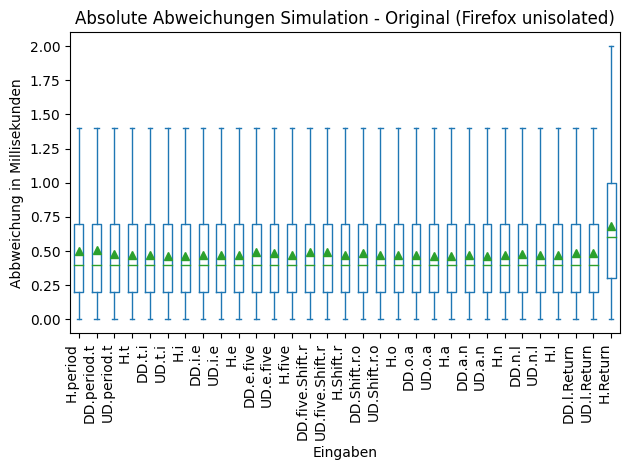

In [84]:
# Firefox unisolated warm up
browser_data_set = pd.read_csv("./firefox/password_data_firefox_unisolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated", out="./firefox/password_data_firefox_unisolated_warmup/fig.jpeg")

In [ ]:
# Edge isolated
browser_data_set = pd.read_csv("./edge/password_data_edge_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Edge", isolated="isolated",out="./edge/password_data_edge_isolated/fig.jpeg")


In [ ]:
# Edge unisolated
browser_data_set = pd.read_csv("./edge/password_data_edge_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Edge", isolated="ununisolated",out="./edge/password_data_edge_unisolated/fig.jpeg")


In [ ]:
# Edge isolated warm up
browser_data_set = pd.read_csv("./edge/password_data_edge_isolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Edge", isolated="isolated",out="./edge/password_data_edge_isolated_warmup/fig.jpeg")

In [ ]:
 # Edge unisolated warm up
browser_data_set = pd.read_csv("./edge/password_data_edge_unisolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Edge", isolated="ununisolated",out="./edge/password_data_edge_unisolated_warmup/fig.jpeg")

In [ ]:
# Chromium isolated
browser_data_set = pd.read_csv("./chromium/password_data_chromium_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Chromium", isolated="isolated", out="./chromium/password_data_chromium_isolated/fig.jpeg")

In [ ]:
# Chromium isolated warm up
browser_data_set = pd.read_csv("./chromium/password_data_chromium_isolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
#visualize(diffs, browser="Chromium", isolated="isolated", out="./chromium/password_data_chromium_isolated_warmup/fig.jpeg")

In [ ]:
# Chromium unisolated
browser_data_set = pd.read_csv("./chromium/password_data_chromium_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Chromium", isolated="unisolated", out="./chromium/password_data_chromium_unisolated/fig.jpeg")


In [ ]:
# Chromium unisolated warm up
browser_data_set = pd.read_csv("./chromium/password_data_chromium_unisolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Chromium", isolated="unisolated", out="./chromium/password_data_chromium_unisolated_warmup/fig.jpeg")

In [ ]:
# Chrome isolated
browser_data_set = pd.read_csv("./chrome/password_data_chrome_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Chrome", isolated="isolated", out="./chrome/password_data_chrome_isolated/fig.jpeg")


In [ ]:
# Chrome isolated warm up
browser_data_set = pd.read_csv("./chrome/password_data_chrome_isolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Chrome", isolated="isolated", out="./chrome/password_data_chrome_isolated_warmup/fig.jpeg")

In [ ]:
# Chrome unisolated
browser_data_set = pd.read_csv("./chrome/password_data_chrome_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Chrome", isolated="unisolated", out="./chrome/password_data_chrome_unisolated/fig.jpeg")


In [ ]:
# Chrome unisolated warm up
browser_data_set = pd.read_csv("./chrome/password_data_chrome_unisolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Chrome", isolated="unisolated", out="./chrome/password_data_chrome_unisolated_warmup/fig.jpeg")

In [ ]:
# Tor unisolated
browser_data_set = pd.read_csv("./tor/password_data_tor_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Tor", isolated="unisolated", out="./tor/password_data_tor_unisolated/fig.jpeg")


In [ ]:
# Tor unisolated warm up
browser_data_set = pd.read_csv("./tor/password_data_tor_unisolated_warmup/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
calc(diffs)
visualize(diffs, browser="Tor", isolated="unisolated", out="./tor/password_data_tor_unisolated_warmup/fig.jpeg")

In [ ]:
# Safari isolated
browser_data_set = pd.read_csv("./safari/password_data_safari_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Safari", isolated="isolated", out="./safari/password_data_safari_isolated/fig.jpeg")


In [ ]:
# Safari unisolated
browser_data_set = pd.read_csv("./safari/password_data_safari_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
#visualize(diffs, browser="Safari", isolated="unisolated", out="./safari/password_data_safari_unisolated/fig.jpeg")

Min:   0.0
Max:   100.7
Mean:  0.4
STD:  0.8


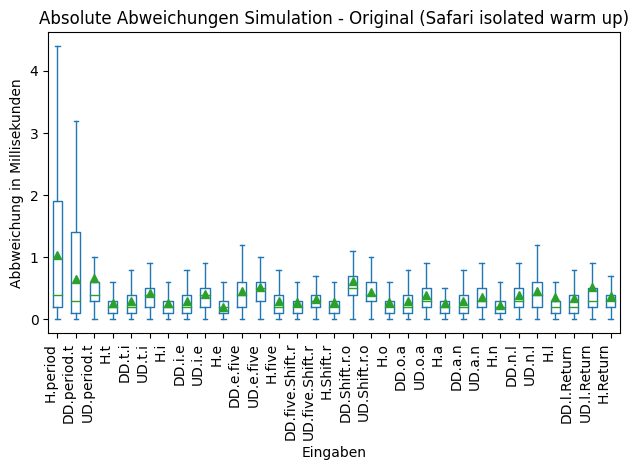

In [83]:
# Safari isolated warm up
safari_isolated_warmup = pd.read_csv(f'./safari/password_data_safari_isolated_warmup/full_data_set.csv')

diffs = calculate_differences(safari_isolated_warmup, original_data_set)
calc(diffs)
visualize(diffs, browser="Safari", isolated="isolated warm up", out=f"./safari/password_data_safari_isolated_warmup/fig_safari_isolated.jpeg")

In [ ]:
# Safari unisolated warm up
safari_unisolated_warmup = pd.read_csv(f'./safari/password_data_safari_unisolated_warmup/full_data_set.csv')

diffs = calculate_differences(safari_unisolated_warmup, original_data_set)
calc(diffs)
visualize(diffs, browser="Safari", isolated="unisolated warm up", out=f"./safari/password_data_safari_unisolated_warmup/fig.jpeg")

plt.show()


In [ ]:
# Firefox isolated warm up and resistFingerprinting
firefox_isolated_warmup_resist = pd.read_csv('./firefox_resistFP/firefox_isolated_resistFP/full_data_set.csv')

diffs = calculate_differences(firefox_isolated_warmup_resist, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="isolated warm up | resistFingerprinting", out="./firefox_resistFingerprinting/firefox_isolated_resistFingerprinting_true/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting
firefox_unisolated_warmup_resist = pd.read_csv('./firefox_resistFP/firefox_unisolated_resistFP/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting", out="./firefox_resistFP/firefox_unisolated_resistFP/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 20ms
firefox_unisolated_warmup_resist_20ms = pd.read_csv('./firefox_resistFP_20/firefox_unisolated_resistFP_20ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_20ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 20ms", out="./firefox_resistFP_20/firefox_unisolated_resistFP_20ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 33ms
firefox_unisolated_warmup_resist_33ms = pd.read_csv('./firefox_resistFP_33/firefox_unisolated_resistFP_33ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_33ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 33ms", out="./firefox_resistFP_33/firefox_unisolated_resistFP_33ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 40ms
firefox_unisolated_warmup_resist_40ms = pd.read_csv('./firefox_resistFP_40/firefox_unisolated_resistFP_40ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_40ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 40ms", out="./firefox_resistFP_40/firefox_unisolated_resistFP_40ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 60ms
firefox_unisolated_warmup_resist_60ms = pd.read_csv('./firefox_resistFP_60/firefox_unisolated_resistFP_60ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_60ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 60ms", out="./firefox_resistFP_60/firefox_unisolated_resistFP_60ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 80ms
firefox_unisolated_warmup_resist_80ms = pd.read_csv('./firefox_resistFP_80/firefox_unisolated_resistFP_80ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_80ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 80ms", out="./firefox_resistFP_80/firefox_unisolated_resistFP_80ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 100ms
firefox_unisolated_warmup_resist_100ms = pd.read_csv('./firefox_resistFP_100/firefox_unisolated_resistFP_100ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_100ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 100ms", out="./firefox_resistFP_100/firefox_unisolated_resistFP_100ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 120ms
firefox_unisolated_warmup_resist_120ms = pd.read_csv('./firefox_resistFP_120/firefox_unisolated_resistFP_120ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_120ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 120ms", out="./firefox_resistFP_120/firefox_unisolated_resistFP_120ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 140ms
firefox_unisolated_warmup_resist_140ms = pd.read_csv('./firefox_resistFP_140/firefox_unisolated_resistFP_140ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_140ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 140ms", out="./firefox_resistFP_140/firefox_unisolated_resistFP_140ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 160ms
firefox_unisolated_warmup_resist_160ms = pd.read_csv('./firefox_resistFP_160/firefox_unisolated_resistFP_160ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_160ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 160ms", out="./firefox_resistFP_160/firefox_unisolated_resistFP_160ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 180ms
firefox_unisolated_warmup_resist_180ms = pd.read_csv('./firefox_resistFP_180/firefox_unisolated_resistFP_180ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_180ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 180ms", out="./firefox_resistFP_180/firefox_unisolated_resistFP_180ms/fig.jpeg")

In [ ]:
# Firefox unisolated warm up and resistFingerprinting 200ms
firefox_unisolated_warmup_resist_200ms = pd.read_csv('./firefox_resistFP_200/firefox_unisolated_resistFP_200ms/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_200ms, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 200ms", out="./firefox_resistFP_200/firefox_unisolated_resistFP_200ms/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting NJ
firefox_unisolated_warmup_resist_NJ = pd.read_csv('./firefox_resistFP_NJ/firefox_unisolated_resistFP_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting NJ", out="./firefox_resistFP_NJ/firefox_unisolated_resistFP_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 20ms NJ
firefox_unisolated_warmup_resist_20ms_NJ = pd.read_csv('./firefox_resistFP_20_NJ/firefox_unisolated_resistFP_20ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_20ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 20ms NJ", out="./firefox_resistFP_20_NJ/firefox_unisolated_resistFP_20ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 33ms NJ
firefox_unisolated_warmup_resist_33ms_NJ = pd.read_csv('./firefox_resistFP_33_NJ/firefox_unisolated_resistFP_33ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_33ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 33ms NJ", out="./firefox_resistFP_33_NJ/firefox_unisolated_resistFP_33ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 40ms NJ
firefox_unisolated_warmup_resist_40ms_NJ = pd.read_csv('./firefox_resistFP_40_NJ/firefox_unisolated_resistFP_40ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_40ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 40ms NJ", out="./firefox_resistFP_40_NJ/firefox_unisolated_resistFP_40ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 60ms NJ
firefox_unisolated_warmup_resist_60ms_NJ = pd.read_csv('./firefox_resistFP_60_NJ/firefox_unisolated_resistFP_60ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_60ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 60ms NJ", out="./firefox_resistFP_60_NJ/firefox_unisolated_resistFP_60ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 80ms NJ
firefox_unisolated_warmup_resist_80ms_NJ = pd.read_csv('./firefox_resistFP_80_NJ/firefox_unisolated_resistFP_80ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_80ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 80ms NJ", out="./firefox_resistFP_80_NJ/firefox_unisolated_resistFP_80ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 100ms NJ
firefox_unisolated_warmup_resist_100ms_NJ = pd.read_csv('./firefox_resistFP_100_NJ/firefox_unisolated_resistFP_100ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_100ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 100ms NJ", out="./firefox_resistFP_100_NJ/firefox_unisolated_resistFP_100ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 120ms NJ
firefox_unisolated_warmup_resist_120ms_NJ = pd.read_csv('./firefox_resistFP_120_NJ/firefox_unisolated_resistFP_120ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_120ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 120ms NJ", out="./firefox_resistFP_120_NJ/firefox_unisolated_resistFP_120ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 140ms NJ
firefox_unisolated_warmup_resist_140ms_NJ = pd.read_csv('./firefox_resistFP_140_NJ/firefox_unisolated_resistFP_140ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_140ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 140ms NJ", out="./firefox_resistFP_140_NJ/firefox_unisolated_resistFP_140ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 160ms NJ
firefox_unisolated_warmup_resist_160ms_NJ = pd.read_csv('./firefox_resistFP_160_NJ/firefox_unisolated_resistFP_160ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_160ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 160ms NJ", out="./firefox_resistFP_160_NJ/firefox_unisolated_resistFP_160ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 180ms NJ
firefox_unisolated_warmup_resist_180ms_NJ = pd.read_csv('./firefox_resistFP_180_NJ/firefox_unisolated_resistFP_180ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_180ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 180ms NJ", out="./firefox_resistFP_180_NJ/firefox_unisolated_resistFP_180ms_NJ/fig.jpeg")

In [ ]:
# Firefox unisolated resistFingerprinting 200ms NJ
firefox_unisolated_warmup_resist_200ms_NJ = pd.read_csv('./firefox_resistFP_200_NJ/firefox_unisolated_resistFP_200ms_NJ/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist_200ms_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting 200ms NJ", out="./firefox_resistFP_200_NJ/firefox_unisolated_resistFP_200ms_NJ/fig.jpeg")

Min:   0.0
Max:   16.0
Mean:  0.5
STD:  0.4


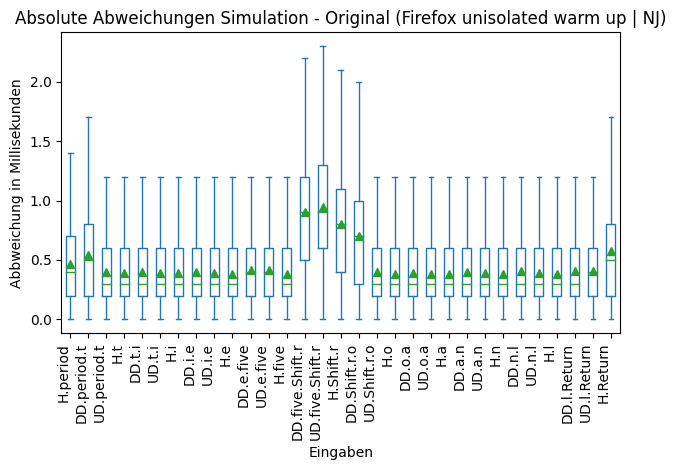

In [82]:
# Firefox unisolated NJ
firefox_unisolated_warmup_NJ = pd.read_csv('./firefox_NJ/password_data_firefox_NJ_unisolated_warmup/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_NJ, original_data_set)
calc(diffs)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | NJ", out="./firefox_NJ/password_data_firefox_NJ_unisolated_warmup/fig.jpeg")